# 📊 Google Play Store Apps Analysis  
### End-to-End Data Analytics Project (Python + SQL + Power BI)

## 📘 Table of Contents
1. Introduction  
2. Business Problem  
3. Importing Libraries  
4. Loading the Dataset  
5. Initial Data Inspection  
6. Data Cleaning  
7. Feature Engineering  
8. Exploratory Data Analysis (EDA)  
9. Visualizations  
10. Final Insights  
11. Next Steps  

---

## 📌 Introduction
This project analyzes over **720,000 Google Play Store apps** to identify trends in:
- Installs  
- Ratings  
- Revenue (Paid Apps)  
- App categories  
- Free vs Paid performance  
- Yearly release/update patterns  

The project simulates a real-world Data Analyst workflow.

---

## 🎯 Business Problem
Google wants to understand:
- Which app categories attract the most users  
- Which categories have the highest satisfaction (ratings)  
- Which paid categories generate the highest revenue  
- How app releases and updates have changed over the years  

This analysis helps improve **app quality**, **user engagement**, and **monetization strategy**.


## 2. Importing Libraries
In this step, we import all necessary Python libraries for data loading, cleaning, and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading the Dataset
We load the Google Play Store dataset and inspect its structure.

In [2]:
df = pd.read_csv('googleplaystore.csv')

/tmp/ipykernel_347/3125341717.py:1: DtypeWarning: Columns (20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('googleplaystore.csv')


## 4. Initial Data Inspection
We examine the dataset to understand the columns, datatypes, and missing values.

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724205 entries, 0 to 724204
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           724204 non-null  object 
 1   App Id             724205 non-null  object 
 2   Category           724205 non-null  object 
 3   Rating             717054 non-null  float64
 4   Rating Count       717054 non-null  float64
 5   Installs           724170 non-null  object 
 6   Minimum Installs   724170 non-null  float64
 7   Maximum Installs   724205 non-null  int64  
 8   Free               724205 non-null  bool   
 9   Price              724205 non-null  float64
 10  Currency           724154 non-null  object 
 11  Size               724148 non-null  object 
 12  Minimum Android    722189 non-null  object 
 13  Developer Id       724198 non-null  object 
 14  Developer Website  486039 non-null  object 
 15  Developer Email    724199 non-null  object 
 16  Re

## 5. Data Cleaning
This step includes handling missing values, fixing data types, cleaning installs, price, and size formats.


#### **Remove duplicates** ####

In [4]:
df.drop_duplicates(inplace=True)

#### **Convert dates to datetime** ####

In [5]:
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Scraped Time'] = pd.to_datetime(df['Scraped Time'], errors='coerce')


#### **Clean Rating (replace 0.0 with category mean)** ####

In [6]:
df['Rating'] = df['Rating'].replace(0, np.nan)

df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)


#### **Clean Rating Count** ####

In [7]:
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')


#### **Clean Installs (just remove + and ,)** ####

In [8]:
df['Installs'] = (
    df['Installs']
    .str.replace('+','')
    .str.replace(',','')
)

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


#### **Clean Price (already looks numeric — confirm)** ####

In [9]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


#### **Remove apps with Zero Installs** ####

In [10]:
df = df[df['Installs'] > 0]


## 8. Exploratory Data Analysis (EDA)
We analyze category distribution, installs, ratings, and free-vs-paid app behavior.


#### **EDA Step 1: Basic Summary** ####

In [11]:
df.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,720558,720559,720559,720559.000000,7.135210e+05,7.205590e+05,7.205590e+05,7.205590e+05,720559,720559.000000,...,484117,720553,698646,720558,720558,589849,720558,720558,720558,720558
unique,698040,720559,48,NaN,NaN,NaN,NaN,NaN,2,NaN,...,301478,385421,NaN,NaN,6,354264,2,2,2,NaN
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,NaN,NaN,NaN,True,NaN,...,http://www.subsplash.com/,support@classplus.co,NaN,NaN,Everyone,http://www.subsplash.com/legal/privacy,False,False,False,NaN
freq,118,1,75090,NaN,NaN,NaN,NaN,NaN,706811,NaN,...,2321,3186,NaN,NaN,630261,2293,360916,659379,720295,NaN
mean,NaN,NaN,NaN,4.104411,2.986694e+03,1.634492e+05,1.634492e+05,2.860453e+05,NaN,0.093581,...,NaN,NaN,2018-08-28 03:05:38.262296320,2019-12-04 13:22:57.222652672,NaN,NaN,NaN,NaN,NaN,2021-06-16 02:19:08.838032896
min,NaN,NaN,NaN,1.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000,...,NaN,NaN,2010-01-29 00:00:00,2009-04-06 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-06-15 20:19:35
25%,NaN,NaN,NaN,3.995540,0.000000e+00,5.000000e+01,5.000000e+01,8.700000e+01,NaN,0.000000,...,NaN,NaN,2017-06-30 00:00:00,2019-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-06-15 23:22:59
50%,NaN,NaN,NaN,4.124740,6.000000e+00,5.000000e+02,5.000000e+02,7.100000e+02,NaN,0.000000,...,NaN,NaN,2019-03-17 00:00:00,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-06-16 02:29:21
75%,NaN,NaN,NaN,4.300000,4.200000e+01,5.000000e+03,5.000000e+03,7.449000e+03,NaN,0.000000,...,NaN,NaN,2020-04-13 00:00:00,2021-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-06-16 05:14:12
max,NaN,NaN,NaN,5.000000,1.385576e+08,5.000000e+09,5.000000e+09,6.265638e+09,NaN,400.000000,...,NaN,NaN,2021-06-15 00:00:00,2021-06-16 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-06-16 08:00:47


In [12]:
df['Category'].nunique()


48

In [13]:
df['Free'].value_counts()


Free
True     706811
False     13748
Name: count, dtype: int64

In [14]:
df['Rating'].describe()


count    720559.000000
mean          4.104411
std           0.510485
min           1.000000
25%           3.995540
50%           4.124740
75%           4.300000
max           5.000000
Name: Rating, dtype: float64

#### **Step 2 — Category-Level Analysis** ####

##### **Categories with Most Apps** #####

In [15]:
df['Category'].value_counts().head(10)


Category
Education            75090
Music & Audio        48347
Tools                45226
Business             44707
Entertainment        43116
Lifestyle            36840
Books & Reference    36197
Personalization      27805
Health & Fitness     25852
Productivity         24902
Name: count, dtype: int64

##### **Categories with Highest Installs** #####

In [16]:
def format_large_numbers(x):
    return f"{x/1e9:.2f}B" if x >= 1e9 else f"{x/1e6:.2f}M"


In [17]:
installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
installs.apply(format_large_numbers).head(10)


Category
Tools                      11.88B
Communication              11.47B
Video Players & Editors     7.64B
Productivity                6.87B
Action                      6.49B
Entertainment               6.12B
Casual                      6.01B
Photography                 4.56B
Arcade                      4.05B
Puzzle                      3.88B
Name: Installs, dtype: object

##### **Categories with Best Average Rating** #####

In [18]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)


Category
Music & Audio        4.293086
Books & Reference    4.288047
Events               4.261977
Arcade               4.255953
Personalization      4.247014
Puzzle               4.233126
Word                 4.226970
Education            4.200089
Shopping             4.190812
Social               4.175709
Name: Rating, dtype: float64

#### **Step 3 — Free vs Paid Apps Analysis** ####

##### **Count Free vs Paid Apps** #####

In [19]:
df['Free'].value_counts()


Free
True     706811
False     13748
Name: count, dtype: int64

##### **Compare Average Ratings (Free vs Paid)** #####

In [20]:
df.groupby('Free')['Rating'].mean()

Free
False    4.138116
True     4.103756
Name: Rating, dtype: float64

##### **Compare Installs (Free vs Paid)** #####

In [21]:
df.groupby('Free')['Installs'].sum().apply(format_large_numbers)

Free
False    136.65M
True     117.64B
Name: Installs, dtype: object

##### **Average Installs Per App (Free vs Paid)** #####

In [22]:
df.groupby('Free')['Installs'].mean().apply(format_large_numbers)


Free
False    0.01M
True     0.17M
Name: Installs, dtype: object

##### **Revenue Potential From Paid Apps** #####

In [23]:
df['Revenue'] = df['Price'] * df['Installs']
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).apply(format_large_numbers).head(10)


Category
Action           45.46M
Tools            35.51M
Business         26.13M
Music & Audio    26.09M
Adventure        25.91M
Simulation       25.50M
Puzzle           23.89M
Role Playing     20.29M
Strategy         17.29M
Racing           15.84M
Name: Revenue, dtype: object

#### **Step 4 — Visualization** ####

##### **Graph 1: Top 10 Categories by Installs** #####

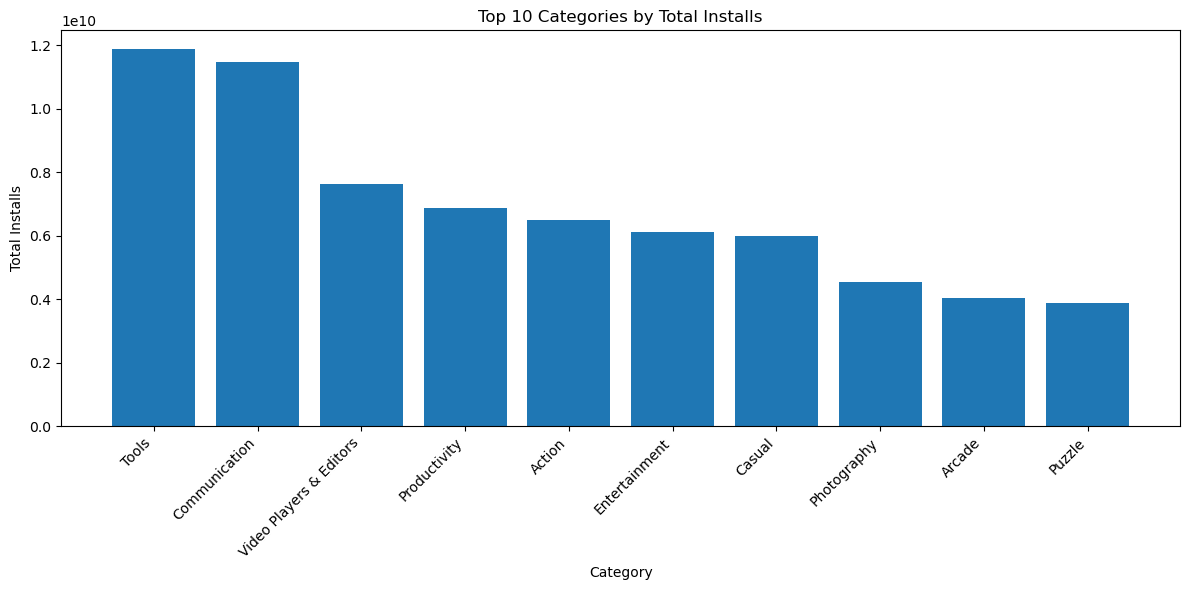

In [24]:
top_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_installs.index, top_installs.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.tight_layout()
plt.show()


##### **Graph 2 — Top 10 Categories by Average Rating** #####

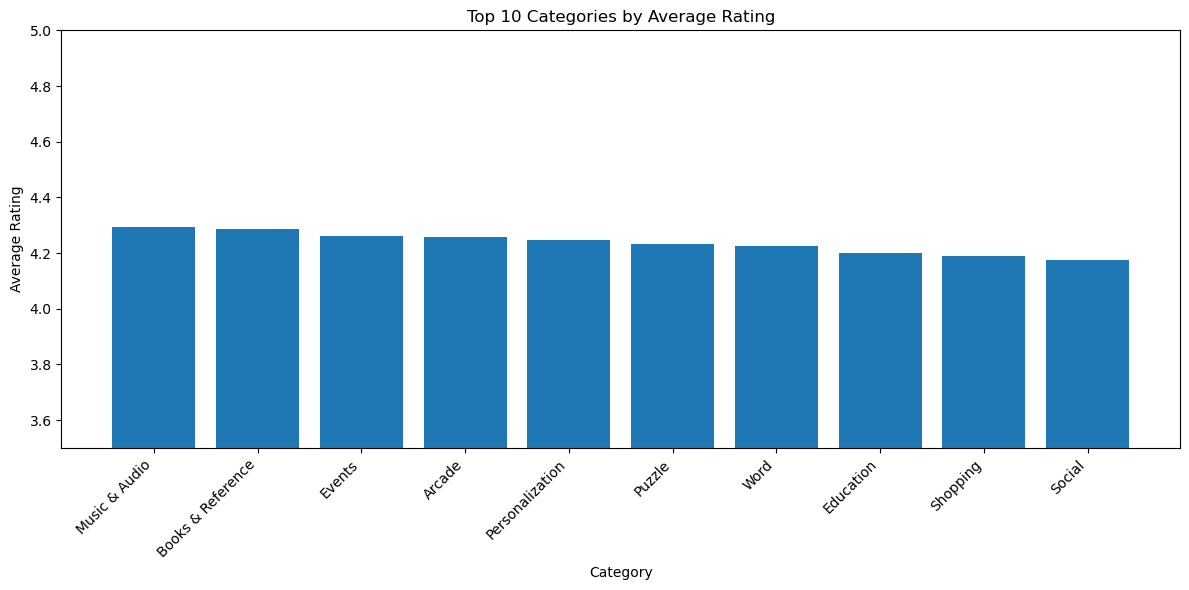

In [25]:
# Calculate top 10 categories by average rating
top_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
plt.bar(top_ratings.index, top_ratings.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.ylim(3.5, 5)  # keep scale focused
plt.tight_layout()
plt.show()


##### **Graph 3 — Free vs Paid: Average Rating Comparison** #####

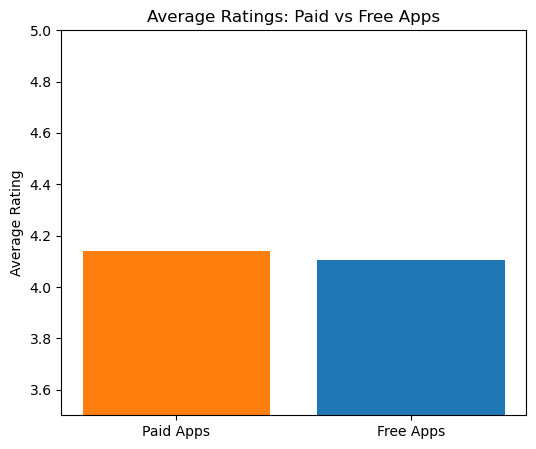

In [26]:
# Data for free vs paid ratings
free_paid_ratings = df.groupby('Free')['Rating'].mean()

# Plot
plt.figure(figsize=(6,5))
plt.bar(['Paid Apps', 'Free Apps'], free_paid_ratings.values, color=['#ff7f0e','#1f77b4'])
plt.title('Average Ratings: Paid vs Free Apps')
plt.ylabel('Average Rating')
plt.ylim(3.5, 5)
plt.show()


##### **Graph 4 — Free vs Paid: Total Installs** #####

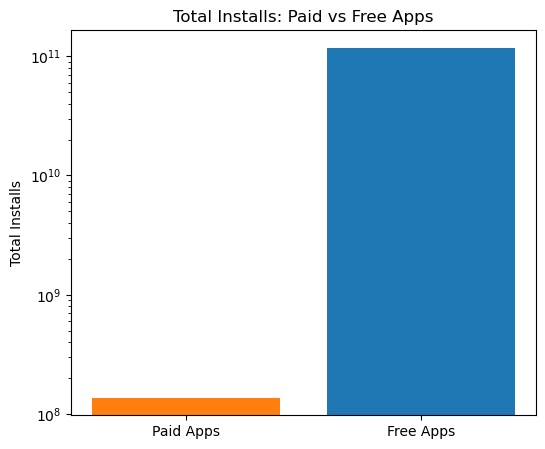

In [27]:
# Total installs for free vs paid
free_paid_installs = df.groupby('Free')['Installs'].sum()

labels = ['Paid Apps', 'Free Apps']
values = free_paid_installs.values

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['#ff7f0e','#1f77b4'])
plt.title('Total Installs: Paid vs Free Apps')
plt.ylabel('Total Installs')
plt.yscale('log')  # makes big differences readable
plt.show()


##### **Graph 5 — Rating Distribution (Histogram)** #####

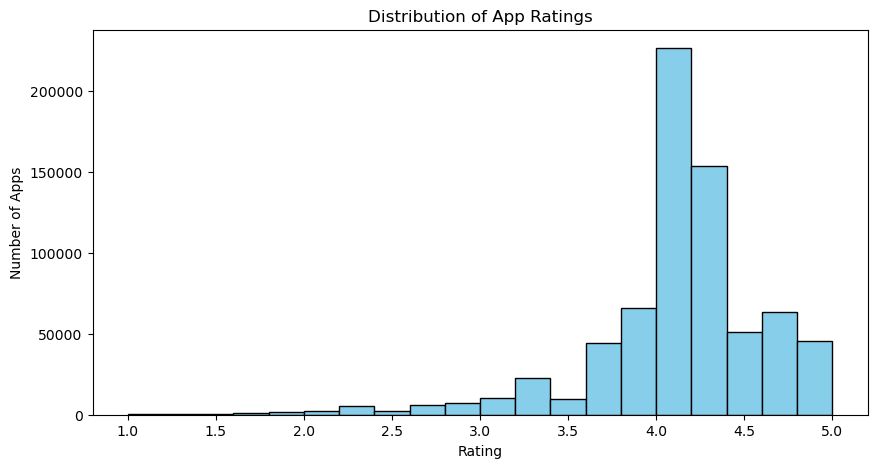

In [28]:
plt.figure(figsize=(10,5))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


##### **Graph 6 — Correlation Heatmap** #####

In [29]:
numeric_df = df[['Rating', 'Rating Count', 'Installs', 'Price', 'Revenue']]
numeric_df.head()


,Rating,Rating Count,Installs,Price,Revenue
0,4.078371,0.0,10.0,0.0,0.0
1,4.400000,64.0,5000.0,0.0,0.0
2,4.021092,0.0,50.0,0.0,0.0
3,5.000000,5.0,10.0,0.0,0.0
4,3.920552,0.0,100.0,0.0,0.0


In [30]:
corr = numeric_df.corr()
corr


,Rating,Rating Count,Installs,Price,Revenue
Rating,1.000000,0.003131,0.001580,0.003370,0.002820
Rating Count,0.003131,1.000000,0.565037,-0.000371,0.003496
Installs,0.001580,0.565037,1.000000,-0.000669,0.000806
Price,0.003370,-0.000371,-0.000669,1.000000,0.048046
Revenue,0.002820,0.003496,0.000806,0.048046,1.000000


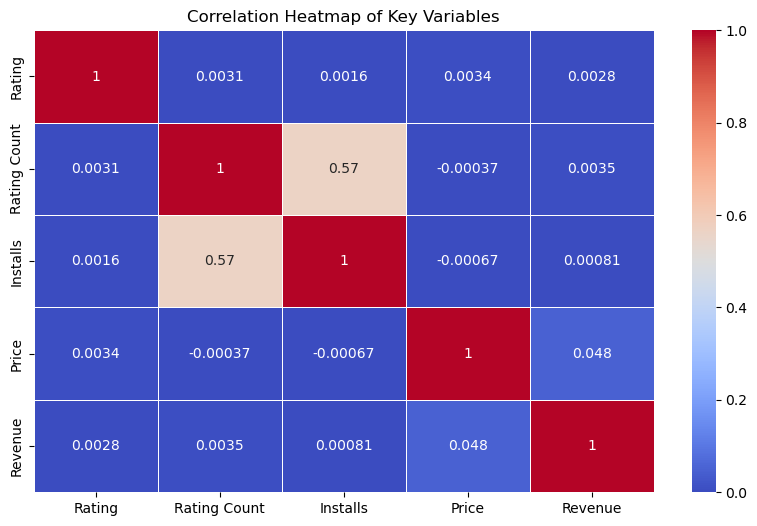

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()


##### **Top 10 Categories by Revenue** #####

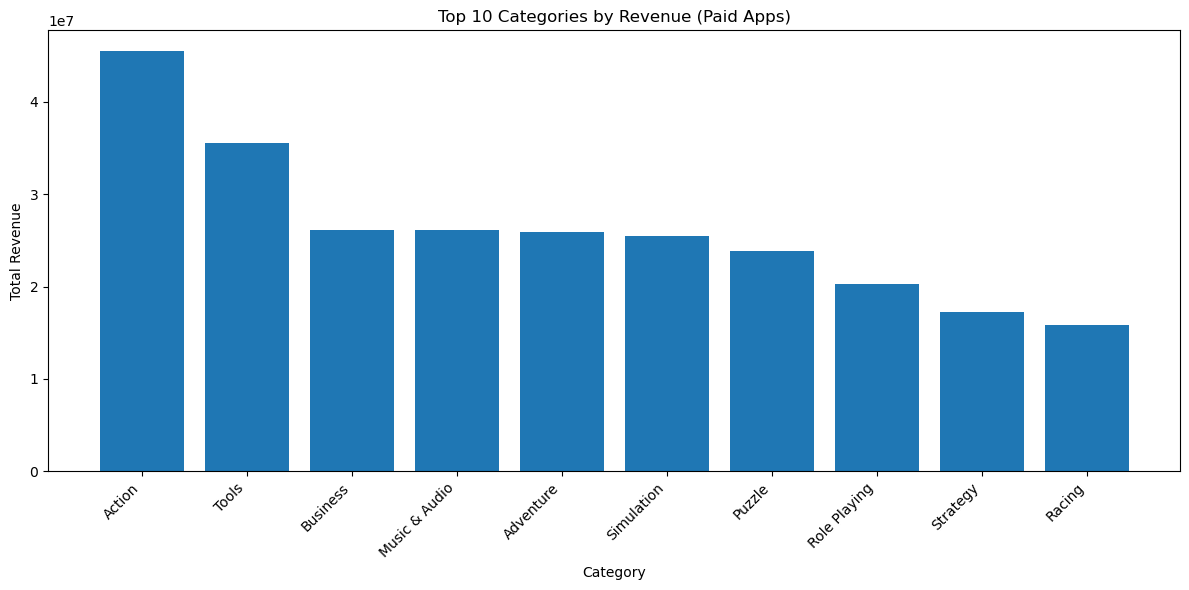

In [32]:
# Calculate revenue per category (already computed earlier as df['Revenue'])
top_revenue = (
    df.groupby('Category')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12,6))
plt.bar(top_revenue.index, top_revenue.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Revenue (Paid Apps)')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


### **cleaned dataset** ###

In [33]:
df.to_csv('googleplaystore_cleaned_safe.csv', index=False, quoting=1)


In [34]:
df.dtypes

App Name                     object
App Id                       object
Category                     object
Rating                      float64
Rating Count                float64
Installs                    float64
Minimum Installs            float64
Maximum Installs              int64
Free                           bool
Price                       float64
Currency                     object
Size                         object
Minimum Android              object
Developer Id                 object
Developer Website            object
Developer Email              object
Released             datetime64[ns]
Last Updated         datetime64[ns]
Content Rating               object
Privacy Policy               object
Ad Supported                 object
In App Purchases             object
Editors Choice               object
Scraped Time         datetime64[ns]
Revenue                     float64
dtype: object

## Final Insights Summary

### Category Insights
- **Tools** and **Communication** have the highest installs (11B+ each).  
- **Music & Audio** and **Books & Reference** have the highest ratings.  

### Revenue Insights (Paid Apps)
- **Action**, **Tools**, and **Business** apps generate the highest revenue.  

### Free vs Paid
- **Free apps dominate installs (~98%)**.  
- **Paid apps have slightly higher ratings (4.14 vs 4.10)**.  

### Trends
- 2020 had the highest number of app releases and updates.  
- App activity decreased in 2021 (policy changes).  